# Assignment 04: Constructing Confidence Interval

Once you are finished, ensure to complete the following steps.
1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.
2.  Fix any errors which result from this.
3.  Repeat steps 1. and 2. until your notebook runs without errors.
4.  Submit your completed notebook to OWL by the deadline.

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import t
import matplotlib.pyplot as plt
seed=1110
np.random.seed(seed)

## Question 1 - <span style="color:green">[100]</span>
You are going to work on a dataset which lists some features of the soccer players participated in the 2022 FIFA World Cup. We want to predict the players value and quantify the uncertainty of our prediction using what we learnt in week 4. The dataset has the following attributes:
- `Age`: Player age in years
- `Overall`: Player overall performance score (higher better)
- `Potential`: Player potential score (higher better)
- `Value`: Player value *i.e*, the amount of money in euros a club should pay in order to purchase the player (higher better)
- `Wage`: Player stipend in euros (higher better)
- `Preferred Foot`: Player preferred foot to play
- `International Reputation`: Player international fame (higher better)
- `Week Foot`: Performance score of player weak foot (higher better)
- `Skill Moves`: Player move skill score (higher better)
- `Body Type`: Player body type
- `Position`: Position player holds on the pitch
- `Height`: Player height in centimeters
- `Weight`: Player weight in kilograms

Therefore the target is `Value`.

### Q 1.1 - <span style="color:red">[1]</span> - Load `data.csv` and show the first 5 rows.

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,27,87,88,91000000.0,115000.0,Right,4.0,4.0,3.0,Stocky,Reserve,189,82
1,27,86,87,78500000.0,190000.0,Right,3.0,3.0,4.0,Stocky,Middle,179,69
2,30,85,85,46500000.0,46000.0,Left,2.0,3.0,3.0,Stocky,Back,172,69
3,31,91,91,107500000.0,350000.0,Right,4.0,5.0,4.0,Stocky,Middle,181,70
4,25,86,89,89500000.0,110000.0,Right,3.0,3.0,3.0,Normal,Middle,172,68


### Q 1.2 - <span style="color:red">[3]</span> - Use a pandas relevant method to reveal `Dtype` of the features and indicate whether the date set has any `Null` values. 

In [3]:
df.dtypes

Age                           int64
Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Body Type                    object
Position                     object
Height                        int64
Weight                        int64
dtype: object

In [4]:
df.isnull().values.any()

False

#### *Written Answer:*

since it is false, there are no null values


### Q 1.3 - <span style="color:red">[3]</span> - Use a pandas relevant method to get a summary statistics of the data and inspect it. Which features have the lowest and highest standard deviation respectively? What was the age of the youngest player in the World Cup? 

In [5]:
describeddata = df.describe()
describeddata

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight
count,17591.000000,17591.000000,17591.000000,1.759100e+04,17591.000000,17591.000000,17591.000000,17591.000000,17591.000000,17591.000000
mean,23.109317,63.354954,70.973907,2.759077e+06,8244.784265,1.103405,2.899324,2.300097,180.893639,74.322779
std,4.623732,8.029464,6.523326,7.852143e+06,20502.356045,0.400888,0.663286,0.752437,6.965210,6.982115
min,15.000000,44.000000,47.000000,1.000000e+03,500.000000,1.000000,1.000000,1.000000,149.000000,48.000000
25%,20.000000,58.000000,67.000000,3.250000e+05,600.000000,1.000000,3.000000,2.000000,176.000000,70.000000
50%,22.000000,63.000000,71.000000,7.000000e+05,2000.000000,1.000000,3.000000,2.000000,181.000000,74.000000
75%,26.000000,69.000000,75.000000,1.800000e+06,6000.000000,1.000000,3.000000,3.000000,186.000000,79.000000
max,54.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000,5.000000,206.000000,110.000000


In [6]:
maxminstd = describeddata.iloc[2].values
print("lowest standard deviation: {}".format(min(maxminstd)))
print("highest standard deviation: {}".format(max(maxminstd)))

youngest = df['Age'].values
print("the youngest player in the World Cup is {} years old".format(min(youngest)))

lowest standard deviation: 0.4008877323312312
highest standard deviation: 7852143.223414285
the youngest player in the World Cup is 15 years old


#### *Written Answer:* 
printed above

### Q 1.4 - <span style="color:red">[4]</span> - Use a pandas relevant method to see the distribution of the numerical features all in one plot window. Which ones look like Gaussian?

In [7]:
#to get numerical features:
num_df = df.select_dtypes(np.number)
num_df.head()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight
0,27,87,88,91000000.0,115000.0,4.0,4.0,3.0,189,82
1,27,86,87,78500000.0,190000.0,3.0,3.0,4.0,179,69
2,30,85,85,46500000.0,46000.0,2.0,3.0,3.0,172,69
3,31,91,91,107500000.0,350000.0,4.0,5.0,4.0,181,70
4,25,86,89,89500000.0,110000.0,3.0,3.0,3.0,172,68


array([<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
       <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
       <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
       <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
       <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
      dtype=object)

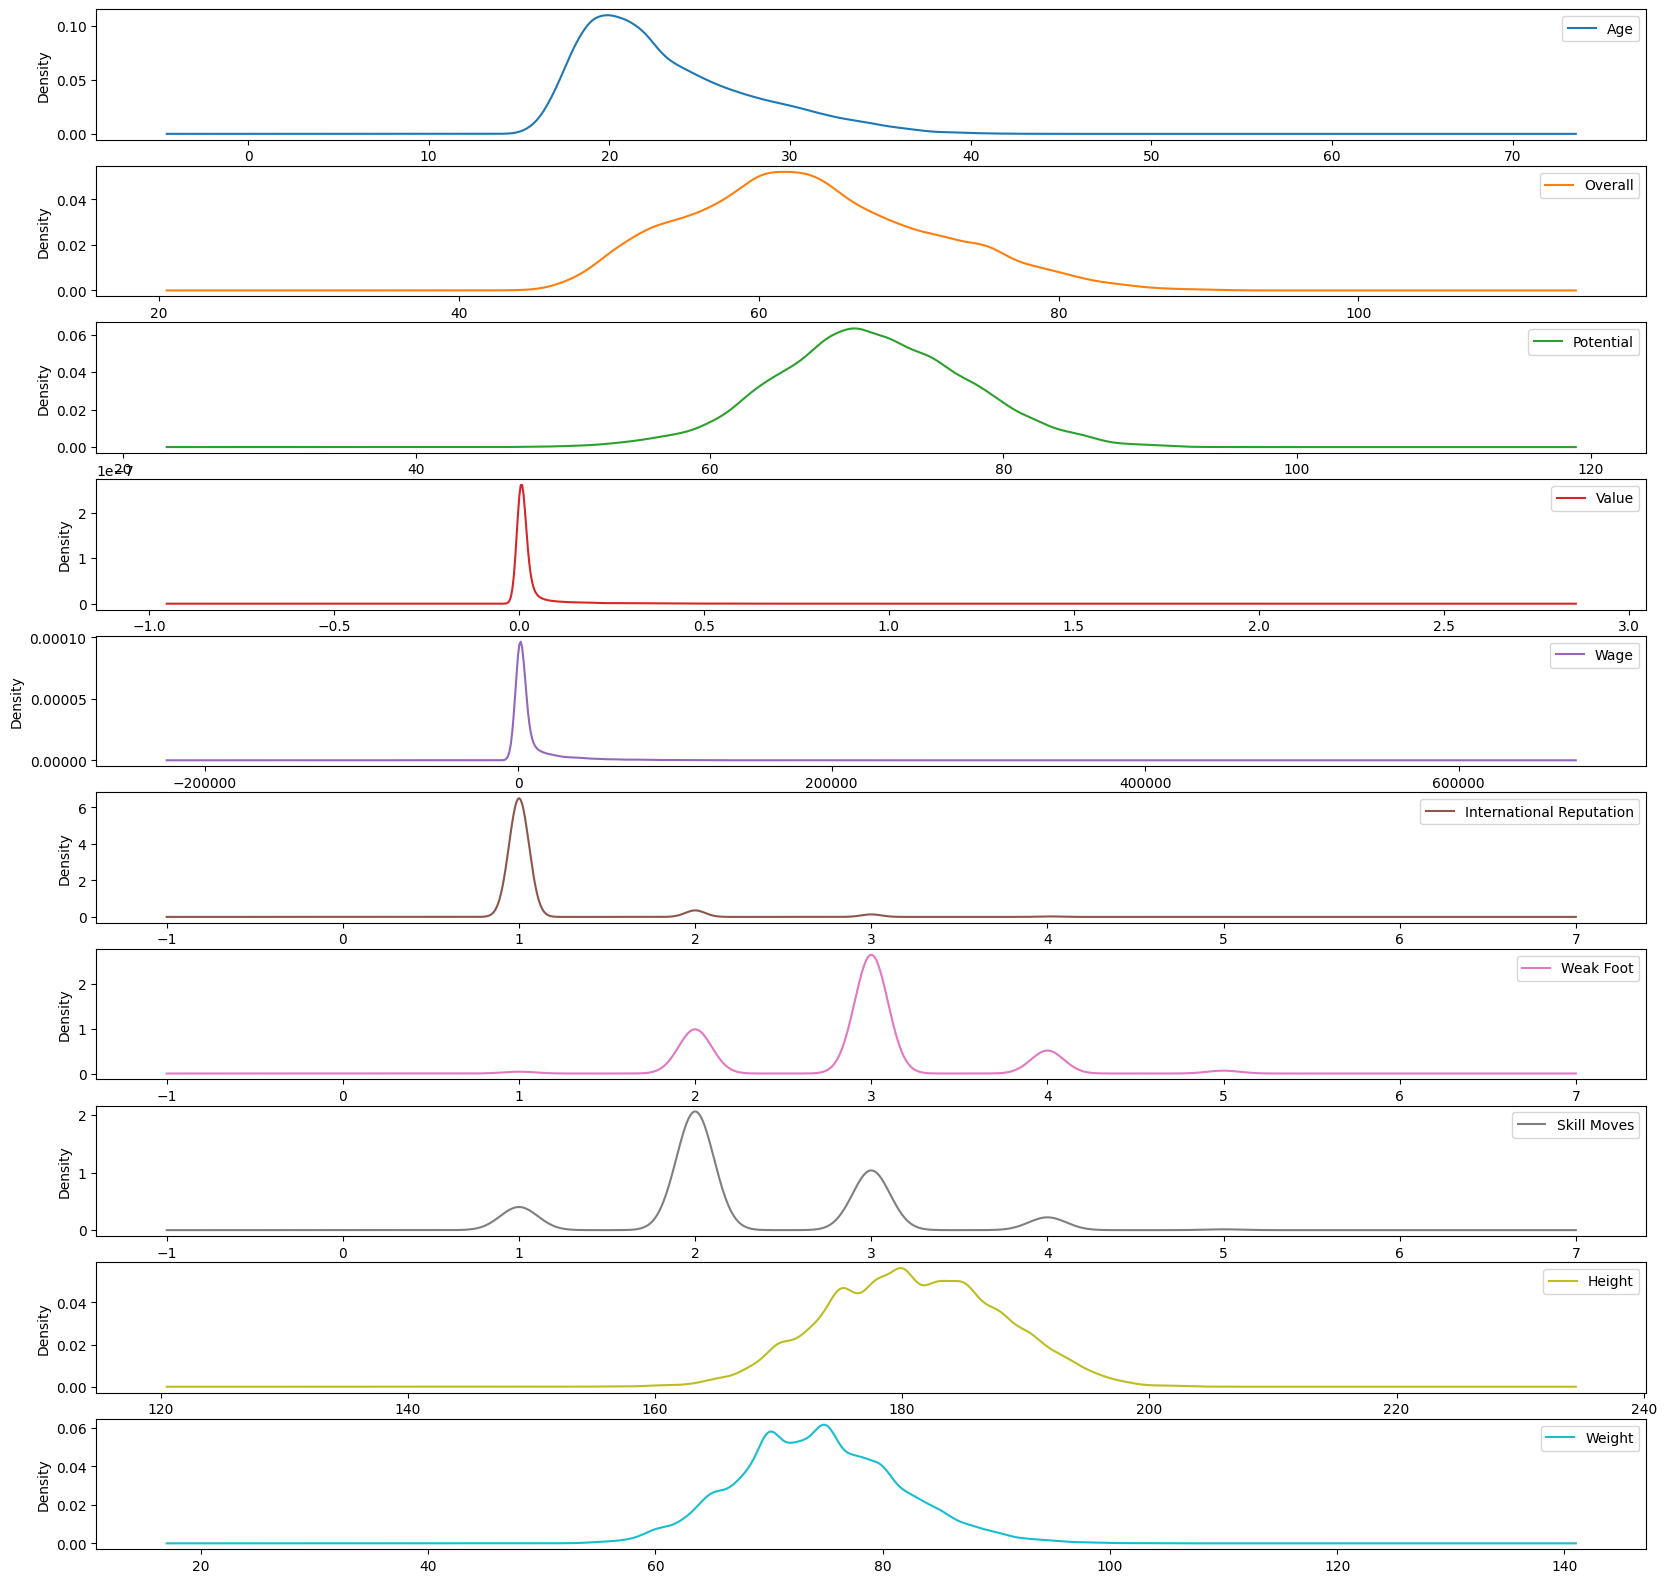

In [8]:
num_df.plot(subplots=True, kind='kde',sharex = False, figsize = (20,20))
#sharex = False is extremely necessary so all the curves are illustrated correctly

#### *Written Answer:*
the first 6 subplots, Age, Overall, Potential, Value, Wage, International Reputation, all seem to follow a gaussian distribution. Week Foot and Skill Moves seem to contain 3-4 gaussian distributions if the data is broken up, but by itself there are many humps. Height and Weight almost seem to follow a gaussian distribution, however there are many small humps. 

### Q 1.5 - <span style="color:red">[2]</span> - Perform one hot encoding to prepare the categorical values for linear regression.

In [9]:
dataOHE = df.copy()
ohe = OneHotEncoder()
#Preferred Foot , Body Type, Position are the 3 object types, lets convert to numbers
pref = ohe.fit_transform(dataOHE["Preferred Foot"].values.reshape(-1,1)).toarray()
body = ohe.fit_transform(dataOHE["Body Type"].values.reshape(-1,1)).toarray()
pos = ohe.fit_transform(dataOHE["Position"].values.reshape(-1,1)).toarray()

dfOneHot_pref = pd.DataFrame(pref, columns = ["Preferred_Foot_"+str(str(i)) for i in ["Left","Right"]])
dfOneHot_body = pd.DataFrame(body, columns = ["Body_Type_"+str(str(i)) for i in ["Lean","Normal","Stocky"]])
dfOneHot_pos = pd.DataFrame(pos, columns = ["Position_"+str(str(i)) for i in ["Back","Forward","Middle","Reserve"]])

#To add all back into the original dataframe 
dataOHE = pd.concat([dfOneHot_pref, dfOneHot_body, dfOneHot_pos, dataOHE], axis=1)

#droping the 3 object columns
dataOHE = dataOHE.drop(["Preferred Foot"], axis=1)
dataOHE = dataOHE.drop(['Body Type'], axis=1)
dataOHE = dataOHE.drop(['Position'], axis=1)

dataOHE.head()

,Preferred_Foot_Left,Preferred_Foot_Right,Body_Type_Lean,Body_Type_Normal,Body_Type_Stocky,Position_Back,Position_Forward,Position_Middle,Position_Reserve,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,27,87,88,91000000.0,115000.0,4.0,4.0,3.0,189,82
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27,86,87,78500000.0,190000.0,3.0,3.0,4.0,179,69
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,30,85,85,46500000.0,46000.0,2.0,3.0,3.0,172,69
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,31,91,91,107500000.0,350000.0,4.0,5.0,4.0,181,70
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,25,86,89,89500000.0,110000.0,3.0,3.0,3.0,172,68


### Q 1.6 - <span style="color:red">[4]</span> - Use `seaborn.jointplot` to investigate the relationship between `Overall` and `Value` as well as `Wage` and `Value`.

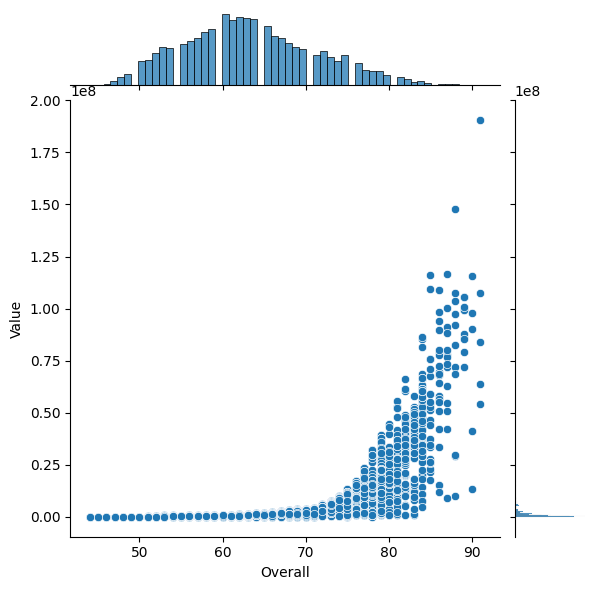

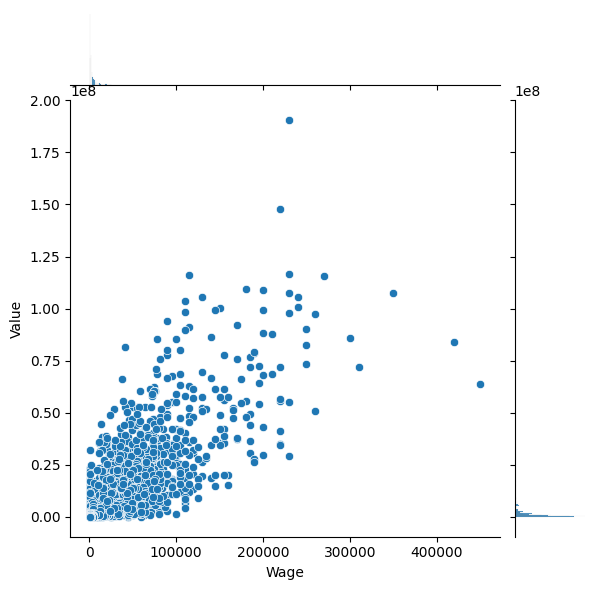

In [10]:
sns.jointplot(data=dataOHE, x='Overall', y='Value')
sns.jointplot(data=dataOHE, x='Wage', y='Value')
plt.show()

### Q 1.7 - <span style="color:red">[8]</span> - Where applicable, use logarithm function to transform either `Overall`, `Wage`, or `Value` to make them better fit the assumptions of linear regression. `Joinplot` the transformed versions.

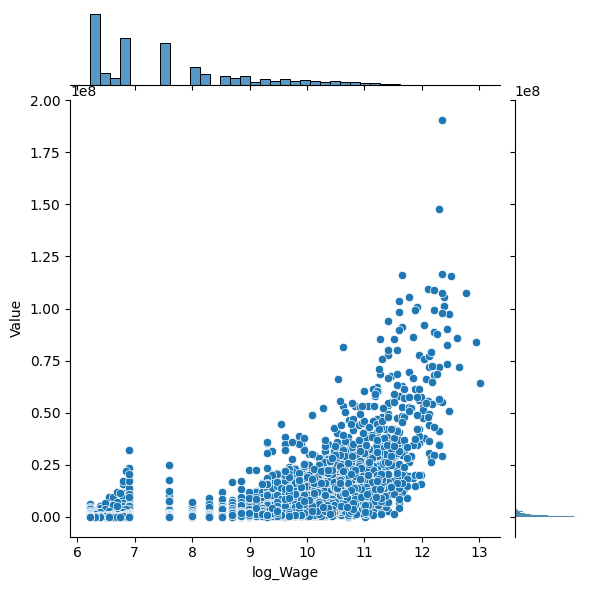

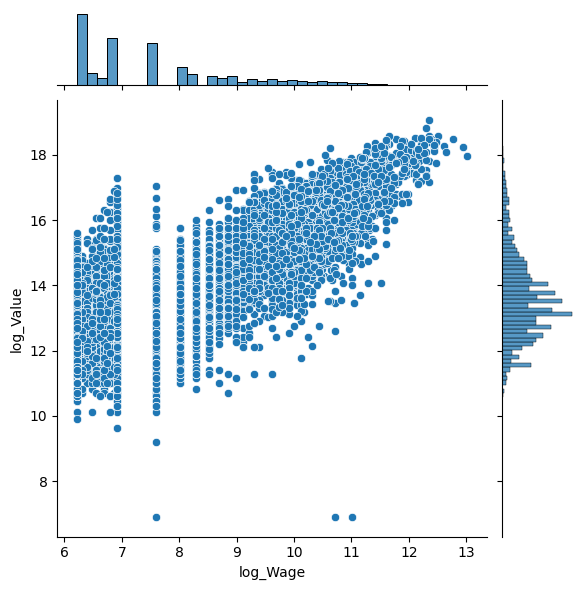

In [11]:
#i feel that Overall and value seem to be normally distributed, but Wage and value arent. lets log Wage and Value and see the difference
dataOHE['log_Wage'] = np.log(df['Wage'])
sns.jointplot(x='log_Wage', y='Value', data=dataOHE)

dataOHE['log_Value'] = np.log(df['Value'])
sns.jointplot(x='log_Wage', y='log_Value', data=dataOHE)
plt.show()

### Q 1.8 - <span style="color:red">[4]</span> - Add the transformed version of the variables which you chose to transform as new columns to your dataframe.

In [12]:
#did this in last question, but now need to drop wage and value
dataOHE = dataOHE.drop(["Wage","Value"], axis=1)
dataOHE.head()

,Preferred_Foot_Left,Preferred_Foot_Right,Body_Type_Lean,Body_Type_Normal,Body_Type_Stocky,Position_Back,Position_Forward,Position_Middle,Position_Reserve,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Height,Weight,log_Wage,log_Value
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,27,87,88,4.0,4.0,3.0,189,82,11.652687,18.326370
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27,86,87,3.0,3.0,4.0,179,69,12.154779,18.178609
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,30,85,85,2.0,3.0,3.0,172,69,10.736397,17.654963
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,31,91,91,4.0,5.0,4.0,181,70,12.765688,18.493001
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,25,86,89,3.0,3.0,3.0,172,68,11.608236,18.309749


### Q 1.9 - <span style="color:red">[4]</span> - Use `pandas.corr()` to output the pairwise correlation between every feature and the target.

In [13]:
corr = dataOHE.corr()
corr

,Preferred_Foot_Left,Preferred_Foot_Right,Body_Type_Lean,Body_Type_Normal,Body_Type_Stocky,Position_Back,Position_Forward,Position_Middle,Position_Reserve,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Height,Weight,log_Wage,log_Value
Preferred_Foot_Left,1.000000,-1.000000,0.027153,-0.021948,-0.010115,0.070141,-0.033520,-0.003394,-0.036819,0.010816,0.062789,0.056893,0.005542,-0.076945,0.094744,-0.066918,-0.070361,0.046997,0.066395
Preferred_Foot_Right,-1.000000,1.000000,-0.027153,0.021948,0.010115,-0.070141,0.033520,0.003394,0.036819,-0.010816,-0.062789,-0.056893,-0.005542,0.076945,-0.094744,0.066918,0.070361,-0.046997,-0.066395
Body_Type_Lean,0.027153,-0.027153,1.000000,-0.897476,-0.173395,-0.067192,-0.058826,0.016876,0.065853,-0.184031,-0.099993,0.040738,-0.065555,-0.006888,0.040778,-0.049393,-0.251692,-0.044396,-0.040339
Body_Type_Normal,-0.021948,0.021948,-0.897476,1.000000,-0.278764,0.044810,0.014120,-0.014952,-0.030424,0.108149,0.022635,-0.074258,-0.030968,-0.011499,-0.072371,0.048138,0.177910,-0.024094,-0.022794
Body_Type_Stocky,-0.010115,0.010115,-0.173395,-0.278764,1.000000,0.046246,0.096558,-0.003358,-0.075453,0.159218,0.167181,0.077108,0.211886,0.040675,0.072808,0.000060,0.150772,0.150465,0.138729
Position_Back,0.070141,-0.070141,-0.067192,0.044810,0.046246,1.000000,-0.082165,-0.135960,-0.638877,0.236082,0.283522,0.143190,0.090303,-0.048277,-0.065084,0.112606,0.138082,0.163103,0.223549
Position_Forward,-0.033520,0.033520,-0.058826,0.014120,0.096558,-0.082165,1.000000,-0.069698,-0.327512,0.144357,0.163993,0.077242,0.099713,0.103831,0.145641,0.035294,0.075266,0.127599,0.149346
Position_Middle,-0.003394,0.003394,0.016876,-0.014952,-0.003358,-0.135960,-0.069698,1.000000,-0.541940,0.174203,0.249691,0.134589,0.080992,0.119948,0.241215,-0.127178,-0.093220,0.159525,0.233806
Position_Reserve,-0.036819,0.036819,0.065853,-0.030424,-0.075453,-0.638877,-0.327512,-0.541940,1.000000,-0.362105,-0.458162,-0.234690,-0.167699,-0.089594,-0.177067,-0.015737,-0.075747,-0.288874,-0.395012
Age,0.010816,-0.010816,-0.184031,0.108149,0.159218,0.236082,0.144357,0.174203,-0.362105,1.000000,0.594686,-0.032881,0.413778,0.130530,0.202264,0.074373,0.237668,0.442761,0.301584


### Q 1.10 - <span style="color:red">[4]</span> - What are the most positively and negatively correlated features? How do you interpret the positive and negative correlations?

In [14]:
def findMaxMin(df):
    mx = 0
    mxloc = ""
    mn = 0
    mnloc = ""
    for row in df.values:
        for i in row:
            if i >= 1 or i <= -1:#this takes out comparing 2 of the same features, or features that are complemetary, like right and left foot
                continue
            if i > mx:
                mx = i
                mxloccol = df[df == row].dropna().index.values
                mxlocrow = df.loc[df[mxloccol[0]] == mx].index.values
            if i < mn:
                mn = i
                mnloccol = df[df == row].dropna().index.values
                mnlocrow = df.loc[df[mnloccol[0]] == mn].index.values
                
    print("The max correlation is {} found in {} and {}".format(mx, mxloccol[0], mxlocrow[0]))
    print("The min correlation is {} found in {} and {}".format(mn, mnloccol[0], mnlocrow[0]))
findMaxMin(corr)

The max correlation is 0.9223626534900179 found in Overall and log_Value
The min correlation is -0.897475974309177 found in Body_Type_Lean and Body_Type_Normal


#### *Written Answer:*
the max and min are provided above, and while correlation is good for linear regression and tells us there is a correlation between 2 variables, it tells us that the more positive correlation, the more useful it could be as a predictor of each other.

### Q 1.11 - <span style="color:red">[15]</span> - Let's train a model to predict player `Value` using all features except some (Hint: think about those which you transformed)
1. This time instead of R-squared, use the `mean_squared_error` to calculate Root Mean Squared Error (RMSE) as your model scorer
2. Split the data into train and test with `test_size=0.2, random_state=seed`
3. Pick `LinearRegression()` from sklearn as your model
4. Report both prediction (*i.e.*, on training set) and generalization (*i.e.*, on test set) RMSE scores of your model

In [15]:
# Define our X and y
X = dataOHE.drop(['log_Value','log_Wage'], axis = 'columns')
y = dataOHE.log_Value

# Split into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state=seed)
print(Xtrain.shape, Xtest.shape)

# Check training and test loss
linmodel = LinearRegression().fit(Xtrain, ytrain)

trainloss = mean_squared_error(ytrain, linmodel.predict(Xtrain))
rmse_train = np.sqrt(trainloss)
print(f"Prediction Loss: %.3f" %  rmse_train)

testloss = mean_squared_error(ytest, linmodel.predict(Xtest))
rmse_test = np.sqrt(testloss)
print(f"Generalization Loss: %.3f" % rmse_test)

(14072, 17) (3519, 17)
Prediction Loss: 0.306
Generalization Loss: 0.326


### Q 1.12 - <span style="color:red">[8]</span> - Scatter plot `Overall` vs true `Value` as well as `Overall` vs predicted `Value` in the same graph window over the test set. 

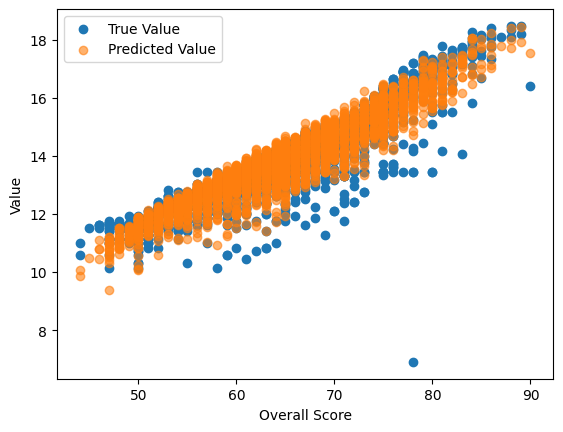

In [16]:
# Get the overall score from the test set
Overall = Xtest['Overall']

# Get the true value and predicted value from the test set
true_value = ytest
pred_value = linmodel.predict(Xtest)

# Create the scatter plot
plt.scatter(Overall, true_value, label='True Value')
plt.scatter(Overall, pred_value, label='Predicted Value', alpha = 0.6)

# Add labels and legend
plt.xlabel('Overall Score')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

### Q 1.13 - <span style="color:red">[15]</span> - Calculate confidence interval (based on 99% confidence level) for mean `Value` by bootstrapping. For this purpose, code a bootstrap function that in each bootstrap iteration, samples from the training set to fit the linear regression model and uses the test set to make predictions - therefore your bootstrap statistic is the average of the predictions over the test set. Your function must take as input arguments: your model, Xtrain, ytrain, Xtest, and numboot=100. The function must return only one object that is the array of recorded values for the bootstrap statistic.

In [17]:
def bootstrap(model, Xtrain, ytrain, Xtest, numboot=100):
    boot_stat = np.zeros(numboot)
    n = len(Xtrain) #same as ytrain
    for i in range(numboot):
        Xtrain_resampled = Xtrain.sample(n, replace=True)
        ytrain_resampled = ytrain.sample(n, replace=True)
        
        model.fit(Xtrain_resampled, ytrain_resampled)
        y_pred = model.predict(Xtest)
        
        boot_stat[i] = np.mean(y_pred)
    return boot_stat

boot_stat = bootstrap(linmodel, Xtrain, ytrain, Xtest)
boot_stat

array([13.64781512, 13.63482235, 13.65110513, 13.65687239, 13.62740196,
       13.64429509, 13.63469245, 13.63427119, 13.65081188, 13.6234547 ,
       13.65509417, 13.63147883, 13.6663162 , 13.63269363, 13.64553378,
       13.6440074 , 13.64808367, 13.64310819, 13.63886017, 13.63482174,
       13.63382224, 13.64025744, 13.64605832, 13.65204258, 13.61870507,
       13.65545881, 13.64812523, 13.64129782, 13.63346609, 13.61904266,
       13.63022526, 13.6634871 , 13.63995025, 13.63892373, 13.66049859,
       13.64223609, 13.64768302, 13.63709117, 13.6380013 , 13.66306852,
       13.64034126, 13.62576714, 13.63933412, 13.61867835, 13.63537241,
       13.6061247 , 13.64653814, 13.65005197, 13.65677081, 13.65687024,
       13.63769621, 13.62680232, 13.63648371, 13.66290261, 13.64023952,
       13.62998745, 13.64854924, 13.65351308, 13.65440053, 13.65474057,
       13.62895273, 13.63152734, 13.63906282, 13.6269223 , 13.63125445,
       13.65294609, 13.62267167, 13.63338259, 13.6284583 , 13.65

### Q 1.14 - <span style="color:red">[6]</span> - Construct a 99% confidence interval using the Central Limit Theorem. 

In [18]:
# Plot 20 of the bootstrapped predictions 
yhat_s = np.mean(pred_value)

boot_CL = 99/100 
p_1 = (1-boot_CL)/2
p_2 = 1-p_1

boot_quant = np.quantile(boot_stat-yhat_s, [p_1, p_2])
print('boot_quant:',boot_quant)

boot_ci = [yhat_s - boot_quant[0], 
           yhat_s - boot_quant[1]]

print("Boot Confidence Interval of 99%:",boot_ci)

boot_quant: [-0.03375285  0.02242232]
Boot Confidence Interval of 99%: [13.67624631734857, 13.620071147287204]


### Q 1.15 - <span style="color:red">[10]</span> - We want to see the effect of sample size ($n$) on the CI calculated from CLT. Write a `for` loop which in each iteration randomly samples from your "sample statistic" and calculates and stores the width (*i.e.*, $\mid$ Upper Bound - Lower Bound $\mid$) of the corresponding CI in an array. Obviously, you should start from a small $n$ and increase it per iteration (step size up to you). After the loop, plot sample size (*i.e.*, $n$) against the CI widths and explain your observation in one sentence.

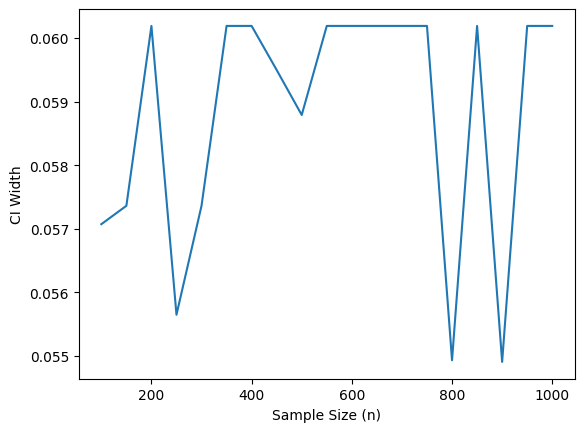

In [19]:
#sample size is n:
ci_widths=[]
sample_size = range(100, 1001,50) #step size of 50
for n in sample_size:
    samples = np.random.choice(boot_stat, size=n, replace=True)
    samples_quant = np.quantile(samples-yhat_s, [p_1, p_2])
    width = abs(samples_quant[0])+abs(samples_quant[1])
    ci_widths.append(width)

# Plot sample size vs CI widths
plt.plot(sample_size, ci_widths)
plt.xlabel('Sample Size (n)')
plt.ylabel('CI Width')
plt.show()

#### *Written Answer:*
We can see after running this a couple of times, the plot is highly variable, and as the sample size increases, the CI width becomes more constant and less variable, providing a more accurate representation of the CI Width

### Q 1.16 - <span style="color:red">[6]</span> - Randomly subsample your "sample statistic" with $n=30$ and calculate $t$-based 99% CI. Is it a good idea to calculate CI for this data set this way? Why?

In [20]:
n = 30
subsample = np.random.choice(boot_stat, size=n, replace=True)

# Calculate the mean of the subsample
mean_subsample = np.mean(subsample)

# Calculate the standard deviation of the subsample
stddev_subsample = np.std(subsample)

alpha = (1/100)
crit_val = 1-(alpha/2)
dof = n-1

#Calculate the T value
t_value = t.ppf(crit_val, df=dof)

# Calculate the lower and upper bounds of the t-based CI
lower_bound = mean_subsample - t_value * stddev_subsample / np.sqrt(n)
upper_bound = mean_subsample + t_value * stddev_subsample / np.sqrt(n)

ci_w = [(mean_subsample - crit_val*stddev_subsample).round(3), 
           (mean_subsample + crit_val*stddev_subsample).round(3)]

# Calculate the width of the t-based CI
width = upper_bound - lower_bound

# Print the results
print("Mean of subsample: ", mean_subsample)
print("Standard deviation of subsample: ", stddev_subsample)
print("t-value: ", t_value)
print("CI interval: ", ci_w)

Mean of subsample:  13.637290931346433
Standard deviation of subsample:  0.010655275104005971
t-value:  2.756385903670335
CI interval:  [13.627, 13.648]


#### *Written Answer:*
It is not a good idea to calculate t-based 99% with n=30, since n can be much larger and can portray a more accurate representation of the data if it has more samples and approaches a more normal distribution. A sample size of 30 may not be large enough for the CLT to hold, which means that the t-based confidence interval may not be a good representation of the true confidence interval for the population mean.

### Q 1.17 - <span style="color:red">[3]</span> -  What method would be your ultimate choice for calculating CI for this problem? Why?

#### *Written Answer:*
In this problem, I believe that using the bootstrapping method would be the most effective, as a small sample size of t may not accurately portray the true data, and bootstrapping is the best way to quantify the uncertainty as it generates data that is closer and closer to being normally distributed. 